In [501]:
import numpy as np
import scipy.special as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [502]:
# Neural Network Class

class neural_network:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Initialize the netowrk
        
        # Set number for all components of the NN
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # Assigning weight matrice to the network : (Subtracted with -0.5 to keep the value b/w -0.5 and +0.5)
        # Weight between input and hidden layer
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        # Size : (no. of hidden nodes x no. of input nodes)
        
        # Weight between hidden and output layer
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        # Size : (no. of output nodes x no. of hidden nodes)
        
        # Activation function, scipy sigmoid function is called expit()
        self.activation_function= lambda x: sp.expit(x)
        
        # ******************************************************************************************************************** #
    
    def train(self, inputs_list, targets_list):
        # Train the network
        # Target is the final wanted output
        
        # The first part is forward propagation which is same as query() method
        inputs = np.array(inputs_list, ndmin = 2).T # ndmin is minimum number of dimensions, .T is transpose
        targets = np.array(targets_list, ndmin = 2).T # ndmin in minimum number of dimensions, .T is transpose
        
        # Duplicating the query method 
        # Hidden inputs and outputs
        hidden_inputs = np.dot(self.wih, inputs) # Multiplies weight matrix input->hidden with inputs
        hidden_outputs = self.activation_function(hidden_inputs) # Calculates sigmoid of the hidden_inputs
        
        # Output layer inputs and outputs
        final_inputs = np.dot(self.who, hidden_outputs) # Multiplies weight matrix hidden->output with hidden outputs
        final_outputs = self.activation_function(final_inputs) # Calculates sigmoid of the output layer to generate OUTPUT
        
        # The second part is backpropagation of errors to update weights
        
        # Output Error
        output_errors = targets - final_outputs
        
        # Error for hidden layer
        hidden_errors = np.dot(self.who.T, output_errors)
                
        # Updating weights between hidden and final layer
        self.who += self.lr*(np.dot((output_errors*final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs)))
        
        #Updating weights between input and hidden layer
        self.wih += self.lr * (np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs)))
        
        # ******************************************************************************************************************** #
    
    def query(self, inputs_list):
        # Processes the input to get output
        inputs = np.array(inputs_list, ndmin = 2).T # .T is same as self.transpose()
    
        # Hidden inputs and outputs
        hidden_inputs = np.dot(self.wih, inputs) # Multiplies weight matrix input->hidden with inputs
        hidden_outputs = self.activation_function(hidden_inputs) # Calculates sigmoid of the hidden_inputs
        
        # Output layer inputs and outputs
        final_inputs = np.dot(self.who, hidden_outputs) # Multiplies weight matrix hidden->output with hidden outputs
        final_outputs = self.activation_function(final_inputs) # Calculates sigmoid of the output layer to generate OUTPUT
        
        return final_outputs
    

In [551]:
# Creating a NN using above class

input_nodes = 784 # No. of pixels
output_nodes = 10 # Possible output values (0-9)
hidden_nodes = 200 # No. of hidden layer nodes
learning_rate = 0.1

n = neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [560]:
# Loading the dataset
mnist = pd.read_csv('./mnist_784.csv')
mnist.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [513]:
mnist_train = mnist[:60000] # Training data consists of 60,000 rows of MNIST Dataset
mnist_test = mnist[60000:] # Test data consists of 10,000 rows of MNIST Dataset

In [556]:
epoch = 9 # No. of times the training data will be used for training

for e in range(epoch):
    for row in mnist_train.iterrows():   # Traverses each row of my training data
        inputs = ((row[1][:784] / 255.0) * 0.99) + 0.01 # Extracts all pixel values and scales them like weight matrix
        targets = np.zeros(output_nodes) + 0.01 # Creates a target series with all elements set to 0
        targets[row[1][-1]] = 0.99 # The 'TRUE' answer for current row is set as 0.99
        n.train(inputs, targets) # Trains the data

In [557]:
scorecard = [] # List to store output as boolean

for i in range(60000, 70000): # Traversing test dataset now
    inp = ((mnist_test.loc[i, 'pixel1':'pixel784'] / 255.0) * 0.99) + 0.01 # Input to be given
    result = np.argmax(n.query(inp)) # Calling query() on input and the highest probable output's index is saved
    if(mnist_test.loc[i, 'class'] == (result)): # Saved index is matched and 1 is stored in scorecard if TRUE occurs
        scorecard.append(1)
    else:
        scorecard.append(0)

In [558]:
scorecard_arr = np.array(scorecard) # Converting scorecard list to numpy array
print('EFFICIENCY IS : ', scorecard_arr.sum()/scorecard_arr.size * 100) # Calculating % efficiency of the code

EFFICIENCY IS :  97.16


# Here are some proofs

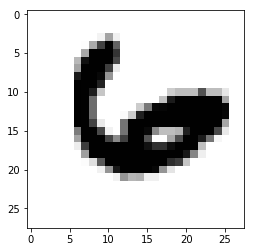

Actual Value :  6
Predicted Value :  6
Prediction is CORRECT!
*************************************************************************


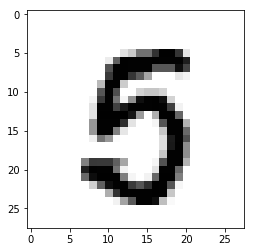

Actual Value :  5
Predicted Value :  5
Prediction is CORRECT!
*************************************************************************


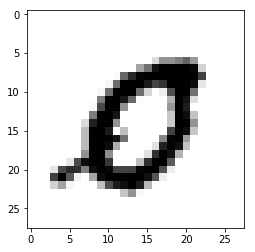

Actual Value :  0
Predicted Value :  0
Prediction is CORRECT!
*************************************************************************


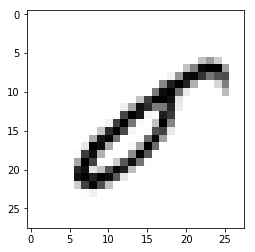

Actual Value :  0
Predicted Value :  5
Prediction is INCORRECT!
*************************************************************************


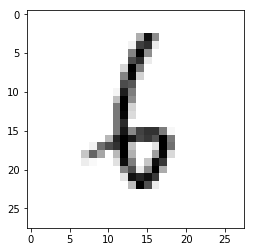

Actual Value :  6
Predicted Value :  6
Prediction is CORRECT!
*************************************************************************


In [599]:
# Selecting 5 random rows rows from test dataset
proof = mnist_test.sample(5)
for row in proof.iterrows(): # Iterate every row of proof dataframe
    plt.figure() # Generate a matplotlib figure
    plt.imshow(row[1][:784].values.reshape(28,28), cmap='gray_r', interpolation=None) # Plot the figure
    plt.show() # Displays the figure
    print('Actual Value : ', row[1][784]) # Prints 'true' value
    inp = ((row[1][:784] / 255) * 0.99) + 0.01 # Prepares input matrix
    pred = np.argmax(n.query(inp)) # Predicts the outcome by query()
    print('Predicted Value : ', pred) # Prints predicted value
    
    if pred == row[1][784]:
        print('Prediction is CORRECT!')
    else:
        print('Prediction is INCORRECT!')
    
    print('*************************************************************************')